In [3]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the sales dataset from github
sales = pd.read_csv('https://raw.githubusercontent.com/GoldenSnow-Xue/schulich_data_science/main/sales_data.csv')

In [5]:
# Get a summary of the dataset structure
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [6]:
# Descriptive statistics
sales.describe()

,Price,Units Sold
count,945.000000,946.000000
mean,107.598688,10.048626
std,124.020322,3.172261
min,0.200000,2.000000
25%,29.430000,8.000000
50%,78.130000,10.000000
75%,142.570000,12.000000
max,2143.300000,22.000000


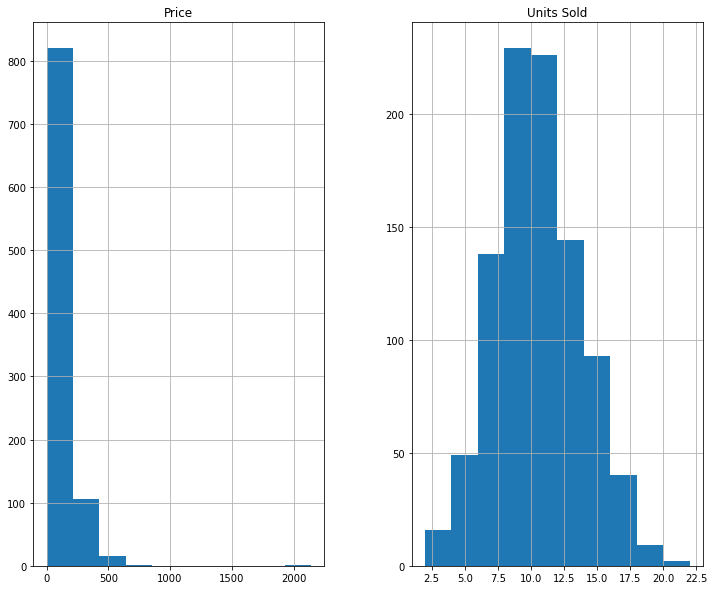

In [7]:
# Histograms
sales.hist(figsize=(12, 10))
plt.show()

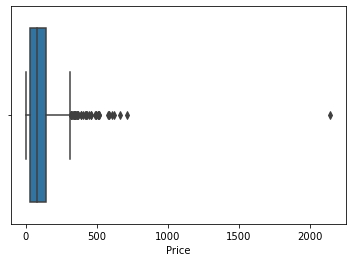

In [10]:
# Boxplot of 'Price' variable
sns.boxplot(x='Price', data=sales)
plt.show()

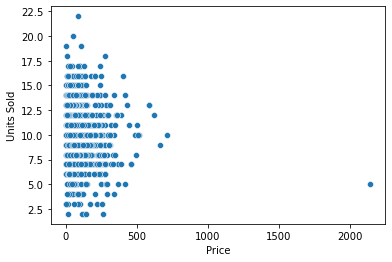

In [8]:
# Scatterplot of 'Price' vs 'Units Sold'
sns.scatterplot(x='Price', y='Units Sold', data=sales)
plt.show()

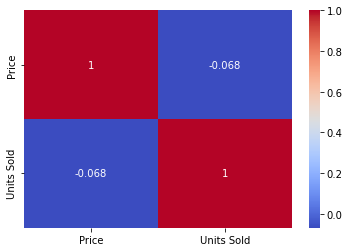

In [9]:
# Correlation matrix heatmap
corr_matrix = sales.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [41]:
# Handling missing values: fill missing 'Price' and 'Units Sold' values with median
sales['Price'].fillna(sales['Price'].median(), inplace=True)
sales['Units Sold'].fillna(sales['Units Sold'].median(), inplace=True)

In [42]:
# Removing duplicates: check for duplicates and drop if any
sales.drop_duplicates(inplace=True)

In [44]:
# Correcting data entry errors: replace any negative 'Price' and 'Units Sold' values with the mean Price and Units Sold
sales.loc[sales['Price'] < 0, 'Price'] = sales['Price'].median()
sales.loc[sales['Units Sold'] < 0, 'Units Sold'] = sales['Units Sold'].median()

In [45]:
# Addressing outliers: remove rows where 'Price' is greater than 3 standard deviations from the mean
Price_mean = sales['Price'].mean()
Price_std = sales['Price'].std()
sales = sales[(sales['Price'] >= Price_mean - 3 * Price_std) & (sales['Price'] <= Price_mean + 3 * Price_std)]

In [46]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     956 non-null    object 
 1   Region      956 non-null    object 
 2   Price       956 non-null    float64
 3   Units Sold  956 non-null    float64
 4   Sale Date   956 non-null    object 
 5   Profit      956 non-null    float64
dtypes: float64(3), object(3)
memory usage: 52.3+ KB


In [47]:
sales.describe()

,Price,Units Sold,Profit
count,956.000000,956.000000,956.000000
mean,87.257646,10.075314,867.097531
std,69.664492,3.022529,749.499894
min,0.200000,2.000000,0.990000
25%,31.317500,8.000000,282.195000
50%,78.130000,10.000000,702.870000
75%,119.002500,12.000000,1198.785000
max,300.820000,22.000000,4910.940000


In [48]:
# Handling missing values: fill missing 'Product' and 'Region' with 'Other'
sales['Product'] = sales['Product'].fillna("Other")
sales['Region'] = sales['Region'].fillna("Other")

C:\Users\Golden Snow\AppData\Local\Temp\ipykernel_30136\2965025397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Product'] = sales['Product'].fillna("Other")
C:\Users\Golden Snow\AppData\Local\Temp\ipykernel_30136\2965025397.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Region'] = sales['Region'].fillna("Other")


In [49]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     956 non-null    object 
 1   Region      956 non-null    object 
 2   Price       956 non-null    float64
 3   Units Sold  956 non-null    float64
 4   Sale Date   956 non-null    object 
 5   Profit      956 non-null    float64
dtypes: float64(3), object(3)
memory usage: 52.3+ KB


In [50]:
sales['Profit'] = sales['Price'] * sales['Units Sold']

C:\Users\Golden Snow\AppData\Local\Temp\ipykernel_30136\4232075718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['Profit'] = sales['Price'] * sales['Units Sold']


In [51]:
sales.groupby('Product')['Profit'].sum().sort_values(ascending=False)

Product
Other         82593.41
Product_30    26021.93
Product_20    21648.46
Product_33    20701.50
Product_1     20605.23
Product_4     19772.57
Product_29    19651.48
Product_13    18877.73
Product_19    18757.22
Product_50    18149.11
Product_45    17830.01
Product_48    17820.04
Product_5     17589.04
Product_23    17497.54
Product_25    17429.03
Product_2     17406.96
Product_41    17030.97
Product_46    16671.55
Product_49    16578.29
Product_14    16576.83
Product_16    15984.60
Product_24    15687.43
Product_43    15389.69
Product_39    15342.68
Product_44    15248.29
Product_31    14731.18
Product_7     14359.70
Product_21    14307.49
Product_28    14174.17
Product_34    14039.65
Product_35    13718.77
Product_40    13529.94
Product_42    13440.66
Product_27    13330.00
Product_17    13167.17
Product_47    12655.90
Product_12    12598.88
Product_10    12288.05
Product_37    12284.83
Product_9     12185.52
Product_6     12088.84
Product_15    11383.48
Product_11    11227.08
Pro

In [54]:
sales_grouped = sales.groupby('Region')
sales_grouped.groups

{'Other': [18, 21, 43, 54, 57, 63, 64, 83, 109, 117, 118, 125, 127, 134, 136, 141, 165, 176, 184, 202, 203, 214, 235, 272, 281, 292, 302, 303, 304, 309, 310, 317, 350, 358, 369, 382, 387, 398, 399, 400, 402, 424, 436, 453, 474, 482, 484, 490, 503, 517, 534, 539, 586, 587, 622, 629, 645, 648, 653, 654, 656, 661, 666, 668, 677, 688, 698, 709, 715, 717, 724, 726, 732, 734, 744, 786, 790, 799, 804, 808, 842, 855, 866, 875, 879, 902, 913, 918, 919, 920, 945, 949, 973, 975, 991, 996], 'Region_1': [1, 3, 5, 30, 42, 49, 77, 110, 113, 114, 144, 149, 156, 162, 179, 181, 222, 236, 241, 245, 258, 265, 268, 284, 295, 296, 319, 322, 325, 332, 334, 340, 353, 357, 362, 377, 405, 446, 454, 505, 515, 524, 543, 545, 561, 563, 568, 571, 575, 609, 642, 663, 699, 700, 712, 713, 730, 737, 758, 778, 780, 784, 795, 821, 825, 832, 833, 835, 860, 863, 876, 908, 915, 921, 922, 934, 936, 940, 959, 964], 'Region_10': [27, 39, 60, 62, 68, 71, 84, 96, 101, 142, 143, 154, 163, 173, 196, 198, 219, 233, 240, 248, 255, 2

In [55]:
sales_grouped['Profit'].sum().sort_values(ascending=False)

Region
Region_9     98572.82
Region_10    88953.50
Other        88288.64
Region_4     77518.42
Region_2     75516.56
Region_5     74923.30
Region_8     74208.18
Region_3     71948.92
Region_6     63595.45
Region_1     60878.77
Region_7     54540.68
Name: Profit, dtype: float64

In [91]:
sales_region_1 = sales_grouped.get_group('Region_1')
sales_region_2 = sales_grouped.get_group('Region_2')
sales_region_3 = sales_grouped.get_group('Region_3')
sales_region_4 = sales_grouped.get_group('Region_4')
sales_region_5 = sales_grouped.get_group('Region_5')
sales_region_6 = sales_grouped.get_group('Region_6')
sales_region_7 = sales_grouped.get_group('Region_7')
sales_region_8 = sales_grouped.get_group('Region_8')
sales_region_9 = sales_grouped.get_group('Region_9')
sales_region_10 = sales_grouped.get_group('Region_10')

In [92]:
sales_region_1_product = sales_region_1.groupby('Product')
sales_region_2_product = sales_region_2.groupby('Product')
sales_region_3_product = sales_region_3.groupby('Product')
sales_region_4_product = sales_region_4.groupby('Product')
sales_region_5_product = sales_region_5.groupby('Product')
sales_region_6_product = sales_region_6.groupby('Product')
sales_region_7_product = sales_region_7.groupby('Product')
sales_region_8_product = sales_region_8.groupby('Product')
sales_region_9_product = sales_region_9.groupby('Product')
sales_region_10_product = sales_region_10.groupby('Product')

In [93]:
sales_region_1_product['Profit'].sum().sort_values(ascending=False)

Product
Other         8673.07
Product_20    4250.63
Product_46    3387.20
Product_1     3071.10
Product_35    2801.68
Product_43    2557.93
Product_41    2496.90
Product_2     2389.17
Product_30    2370.57
Product_6     2338.72
Product_50    2294.94
Product_22    2267.86
Product_7     2031.38
Product_21    1758.62
Product_39    1694.80
Product_9     1577.50
Product_13    1496.02
Product_19    1451.58
Product_34    1321.62
Product_5     1225.80
Product_37    1111.66
Product_49    1103.70
Product_36    1092.66
Product_14    1042.10
Product_10    1015.69
Product_29     888.03
Product_17     558.00
Product_45     522.01
Product_15     496.73
Product_33     443.79
Product_27     336.20
Product_12     260.08
Product_42     239.22
Product_44     130.45
Product_40     115.50
Product_4       55.30
Product_16      10.56
Name: Profit, dtype: float64

In [94]:
sales_region_2_product['Profit'].sum().sort_values(ascending=False)

Product
Other         6375.69
Product_16    5465.34
Product_50    4535.71
Product_23    3949.20
Product_27    3834.18
Product_24    3707.67
Product_39    2898.00
Product_41    2791.84
Product_36    2608.20
Product_38    2595.20
Product_19    2403.88
Product_46    2313.08
Product_29    2170.28
Product_17    2158.58
Product_31    2155.78
Product_34    2090.01
Product_1     2066.30
Product_49    1952.30
Product_9     1848.35
Product_2     1845.67
Product_3     1789.45
Product_26    1725.78
Product_20    1643.00
Product_7     1081.40
Product_5     1079.52
Product_22    1078.56
Product_25    1024.30
Product_10     936.00
Product_18     859.30
Product_43     742.20
Product_12     664.16
Product_32     561.76
Product_35     454.82
Product_48     397.22
Product_45     356.67
Product_14     355.33
Product_21     302.16
Product_6      302.05
Product_30     212.64
Product_13     115.68
Product_44      69.30
Name: Profit, dtype: float64

In [95]:
sales_region_3_product['Profit'].sum().sort_values(ascending=False)

Product
Other         7923.98
Product_30    5393.82
Product_48    4313.79
Product_47    3858.57
Product_41    3299.96
Product_9     3072.24
Product_1     2931.14
Product_20    2775.82
Product_36    2568.14
Product_2     2564.25
Product_18    2247.86
Product_25    2216.52
Product_14    1981.13
Product_11    1953.84
Product_28    1706.71
Product_5     1690.29
Product_46    1410.09
Product_26    1399.33
Product_19    1355.26
Product_10    1328.21
Product_34    1276.86
Product_16    1199.20
Product_21    1170.64
Product_4     1148.28
Product_45    1136.98
Product_32     972.56
Product_42     937.56
Product_50     936.88
Product_33     910.58
Product_23     862.62
Product_12     859.43
Product_37     781.30
Product_38     776.65
Product_7      670.44
Product_13     625.04
Product_29     425.88
Product_27     321.31
Product_31     211.15
Product_39     203.04
Product_17     199.80
Product_40     192.72
Product_35      93.90
Product_3       45.15
Name: Profit, dtype: float64

In [96]:
sales_region_4_product['Profit'].sum().sort_values(ascending=False)

Product
Other         8581.28
Product_50    4670.82
Product_5     3785.29
Product_4     3451.45
Product_31    3391.95
Product_25    3301.69
Product_35    2921.14
Product_19    2879.04
Product_15    2803.03
Product_17    2801.91
Product_39    2501.07
Product_32    2464.77
Product_6     2175.35
Product_10    2170.05
Product_48    2141.05
Product_34    2113.61
Product_27    1990.37
Product_23    1903.66
Product_46    1848.99
Product_21    1626.21
Product_45    1625.82
Product_30    1612.80
Product_22    1601.71
Product_7     1577.52
Product_1     1572.73
Product_37    1369.76
Product_40    1320.15
Product_49    1095.41
Product_44    1022.98
Product_29     909.30
Product_2      703.17
Product_26     634.63
Product_8      583.94
Product_41     524.30
Product_42     468.78
Product_28     427.05
Product_33     390.65
Product_47     242.40
Product_36     174.96
Product_18     111.15
Product_43      24.28
Product_24       2.20
Name: Profit, dtype: float64

In [97]:
sales_region_5_product['Profit'].sum().sort_values(ascending=False)

Product
Product_17    4401.36
Product_11    3843.23
Product_48    3673.11
Product_6     3592.56
Product_10    3498.36
Product_21    3457.22
Product_40    3201.60
Product_27    3031.58
Product_45    2876.23
Product_20    2840.74
Other         2656.11
Product_32    2565.85
Product_29    2512.60
Product_4     2403.28
Product_14    2272.12
Product_44    2109.51
Product_23    1966.11
Product_16    1895.13
Product_31    1808.28
Product_43    1776.82
Product_15    1760.88
Product_5     1675.42
Product_49    1638.89
Product_18    1520.17
Product_42    1274.96
Product_1     1263.04
Product_41    1175.60
Product_24    1150.60
Product_13    1123.42
Product_25    1066.38
Product_36    1065.07
Product_9      885.51
Product_38     843.84
Product_12     625.04
Product_35     493.87
Product_37     403.47
Product_47     399.00
Product_33      91.29
Product_39      71.45
Product_50      13.60
Name: Profit, dtype: float64

In [98]:
sales_region_6_product['Profit'].sum().sort_values(ascending=False)

Product
Other         5867.90
Product_19    5316.56
Product_28    5027.34
Product_39    4160.39
Product_46    3564.73
Product_49    2920.90
Product_13    2827.09
Product_34    2770.23
Product_41    2597.03
Product_48    2200.34
Product_18    2174.64
Product_8     2063.66
Product_17    1948.23
Product_11    1628.56
Product_5     1511.03
Product_43    1499.38
Product_42    1402.32
Product_33    1357.94
Product_1     1270.34
Product_20    1229.67
Product_24    1226.31
Product_30     975.52
Product_12     937.56
Product_29     876.30
Product_15     859.43
Product_35     642.40
Product_7      641.40
Product_44     625.04
Product_26     468.78
Product_10     397.32
Product_40     390.64
Product_36     359.10
Product_27     353.92
Product_25     344.48
Product_6      301.79
Product_16     219.66
Product_14     191.20
Product_9      157.80
Product_50     103.68
Product_31      99.40
Product_37      77.88
Product_3        7.56
Name: Profit, dtype: float64

In [99]:
sales_region_7_product['Profit'].sum().sort_values(ascending=False)

Product
Other         5153.30
Product_43    3532.14
Product_16    2928.60
Product_24    2844.00
Product_44    2585.86
Product_41    2496.24
Product_30    2378.46
Product_25    2346.99
Product_23    2343.23
Product_9     2091.54
Product_33    2035.47
Product_35    1824.96
Product_45    1744.82
Product_47    1678.06
Product_31    1547.84
Product_20    1345.59
Product_49    1246.57
Product_8     1217.07
Product_6     1194.50
Product_29    1183.06
Product_15    1093.82
Product_13    1021.61
Product_19     890.55
Product_14     885.76
Product_37     796.05
Product_32     795.11
Product_40     721.85
Product_18     720.34
Product_48     720.19
Product_27     710.05
Product_11     584.92
Product_2      546.91
Product_5      463.66
Product_7      373.20
Product_4      262.60
Product_10     235.76
Name: Profit, dtype: float64

In [100]:
sales_region_8_product['Profit'].sum().sort_values(ascending=False)

Product
Product_4     4288.37
Product_37    3939.70
Product_5     3771.73
Product_49    3451.80
Product_25    3343.04
Product_28    3322.24
Product_44    3256.08
Other         3194.96
Product_22    3159.72
Product_33    3137.49
Product_13    3080.80
Product_15    2729.07
Product_29    2677.86
Product_48    2482.62
Product_40    2322.68
Product_19    2292.11
Product_8     2004.87
Product_35    1982.70
Product_46    1861.32
Product_16    1740.95
Product_31    1671.68
Product_42    1663.20
Product_30    1449.70
Product_14    1310.10
Product_21    1189.30
Product_9     1073.97
Product_24    1026.80
Product_23     984.49
Product_50     781.30
Product_18     743.12
Product_47     632.20
Product_17     621.05
Product_12     546.91
Product_41     452.40
Product_2      345.28
Product_38     338.50
Product_27     326.40
Product_1      290.84
Product_3      242.71
Product_6      237.90
Product_10     225.10
Product_32      15.12
Name: Profit, dtype: float64

In [101]:
sales_region_9_product['Profit'].sum().sort_values(ascending=False)

Product
Product_4     6517.30
Other         6143.48
Product_2     5197.15
Product_33    4813.71
Product_30    4807.38
Product_12    4448.81
Product_42    4230.22
Product_50    4029.71
Product_13    3744.68
Product_21    3299.39
Product_29    3068.01
Product_38    2937.20
Product_24    2822.16
Product_20    2753.70
Product_26    2740.87
Product_3     2687.33
Product_37    2664.36
Product_47    2607.06
Product_16    2525.16
Product_44    2363.54
Product_40    2268.61
Product_7     2184.67
Product_22    1981.94
Product_28    1819.04
Product_34    1771.90
Product_5     1676.20
Product_43    1379.46
Product_25    1276.36
Product_49    1216.40
Product_48    1138.20
Product_45    1094.04
Product_10    1081.69
Product_31     886.78
Product_15     654.30
Product_35     553.50
Product_18     547.95
Product_1      526.90
Product_41     439.02
Product_46     434.40
Product_19     415.54
Product_27     277.85
Product_6      229.76
Product_32     195.02
Product_36      49.98
Product_23      49.68
Pr

In [102]:
sales_region_10_product['Profit'].sum().sort_values(ascending=False)

Product
Other         16446.98
Product_14     4984.94
Product_13     4843.39
Product_7      3671.98
Product_33     3512.87
Product_47     3238.61
Product_44     3085.53
Product_2      2979.52
Product_31     2958.32
Product_43     2750.27
Product_34     2695.42
Product_8      2645.87
Product_23     2561.68
Product_25     2509.27
Product_27     2148.14
Product_24     2061.59
Product_42     2038.60
Product_36     1867.20
Product_46     1851.74
Product_12     1790.26
Product_6      1716.21
Product_26     1609.74
Product_9      1456.20
Product_4      1363.33
Product_32     1323.67
Product_19     1126.03
Product_28      895.72
Product_40      887.37
Product_22      883.42
Product_21      875.00
Product_37      796.77
Product_50      782.47
Product_45      780.31
Product_5       710.10
Product_1       707.52
Product_41      669.84
Product_17      478.24
Product_15      351.12
Product_30      278.73
Product_38      236.53
Product_48      141.42
Product_11       89.30
Product_10       77.16
Pro

In [ ]:
# 1) What conclusions can you draw about sales performance of various products and regions?

Product
Other         82593.41
Product_30    26021.93
Product_20    21648.46
Product_33    20701.50
Product_1     20605.23
# Actually, the missing values of the Product has the highest profit, following by Product_30, Product_20, Product_33,
#and Product_1 with around 20,000 profit (price*units sold) without thinking about the Products.

Region
Region_9     98572.82
Region_10    88953.50
Other        88288.64
Region_4     77518.42
Region_2     75516.56
# Region_9, Region_10, Other, Region_4 and Region_2 have the highest profit without thinking about the Regions.

# Then I spread out with the regions, trying to figure out which product has the highest profit in different regions.

#In Region 1
Product
Other         8673.07
Product_20    4250.63
Product_46    3387.20
Product_1     3071.10
Product_35    2801.68
#In Region 2
Product
Other         6375.69
Product_16    5465.34
Product_50    4535.71
Product_23    3949.20
Product_27    3834.18
#In Region 3
Product
Other         7923.98
Product_30    5393.82
Product_48    4313.79
Product_47    3858.57
Product_41    3299.96
#In Region 4
Product
Other         8581.28
Product_50    4670.82
Product_5     3785.29
Product_4     3451.45
Product_31    3391.95
#In Region 5
Product
Product_17    4401.36
Product_11    3843.23
Product_48    3673.11
Product_6     3592.56
Product_10    3498.36
#In Region 6
Product
Other         5867.90
Product_19    5316.56
Product_28    5027.34
Product_39    4160.39
Product_46    3564.73
#In Region 7
Product
Other         5153.30
Product_43    3532.14
Product_16    2928.60
Product_24    2844.00
Product_44    2585.86
#In Region 8
Product
Product_4     4288.37
Product_37    3939.70
Product_5     3771.73
Product_49    3451.80
Product_25    3343.04
#In Region 9
Product
Product_4     6517.30
Other         6143.48
Product_2     5197.15
Product_33    4813.71
Product_30    4807.38
#In Region 10
Product
Other         16446.98
Product_14     4984.94
Product_13     4843.39
Product_7      3671.98
Product_33     3512.87
# From the result, I can figure out the sales of the product is influnced by the region, but however, the product_16 
#and the product_4 are very popular.

In [ ]:
# 2) What recommendations do you have for the business?

# I recommend to sell the different products by regions because the sales is really related to the regions 
#and product_16 and product_4 are very popular.



In [ ]:
# 3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

# Handling missing values: fill missing 'Price' and 'Units Sold' values with median
# Because it is not normal distribution so I use median to fill in the missing values.

# Removing duplicates: check for duplicates and drop if any
# Because duplicates will influence the result.

# Correcting data entry errors: replace any negative 'Price' and 'Units Sold' values with the mean Price and Units Sold
# Because these data could not be negative.

# Addressing outliers: remove rows where 'Price' is greater than 3 standard deviations from the mean
# The outlier really make a difference of the result from the boxplot.